[Competition](https://www.kaggle.com/competitions/santander-customer-transaction-prediction/data?select=test.csv)

Reference Code [Here1](https://blog.naver.com/PostView.naver?blogId=ilovelatale&logNo=222284131107&redirect=Dlog&widgetTypeCall=true&directAccess=false), [Here2](https://federicoraimondi.github.io/myProjects/Santander_Customer_Transaction_Prediction/Exploratory_Data_Analysis/Data%20Exploration.html), [Here3](https://medium.com/@aganirbanghosh007/santander-customer-transaction-prediction-a-simple-machine-learning-solution-771613633843)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
submission = pd.read_csv('dataset/sample_submission.csv')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
tmp = train.isnull().sum()

1: 10.05%, 0: 89.95%


<AxesSubplot:xlabel='target', ylabel='count'>

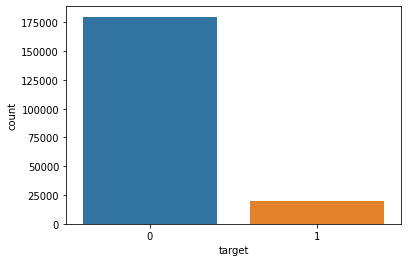

In [7]:
# target 분포 확인
positive = train['target'].value_counts()[1]
negative = train['target'].value_counts()[0]
print('1: {:.2f}%, 0: {:.2f}%'.format(positive * 100/ len(train), negative * 100 / len(train)))

fig, ax = plt.subplots()
sns.countplot(data=train, x='target')

- 불균형 데이터!!!

### 데이터 분포 확인

In [8]:
dfcols = list(train.columns)[2:]

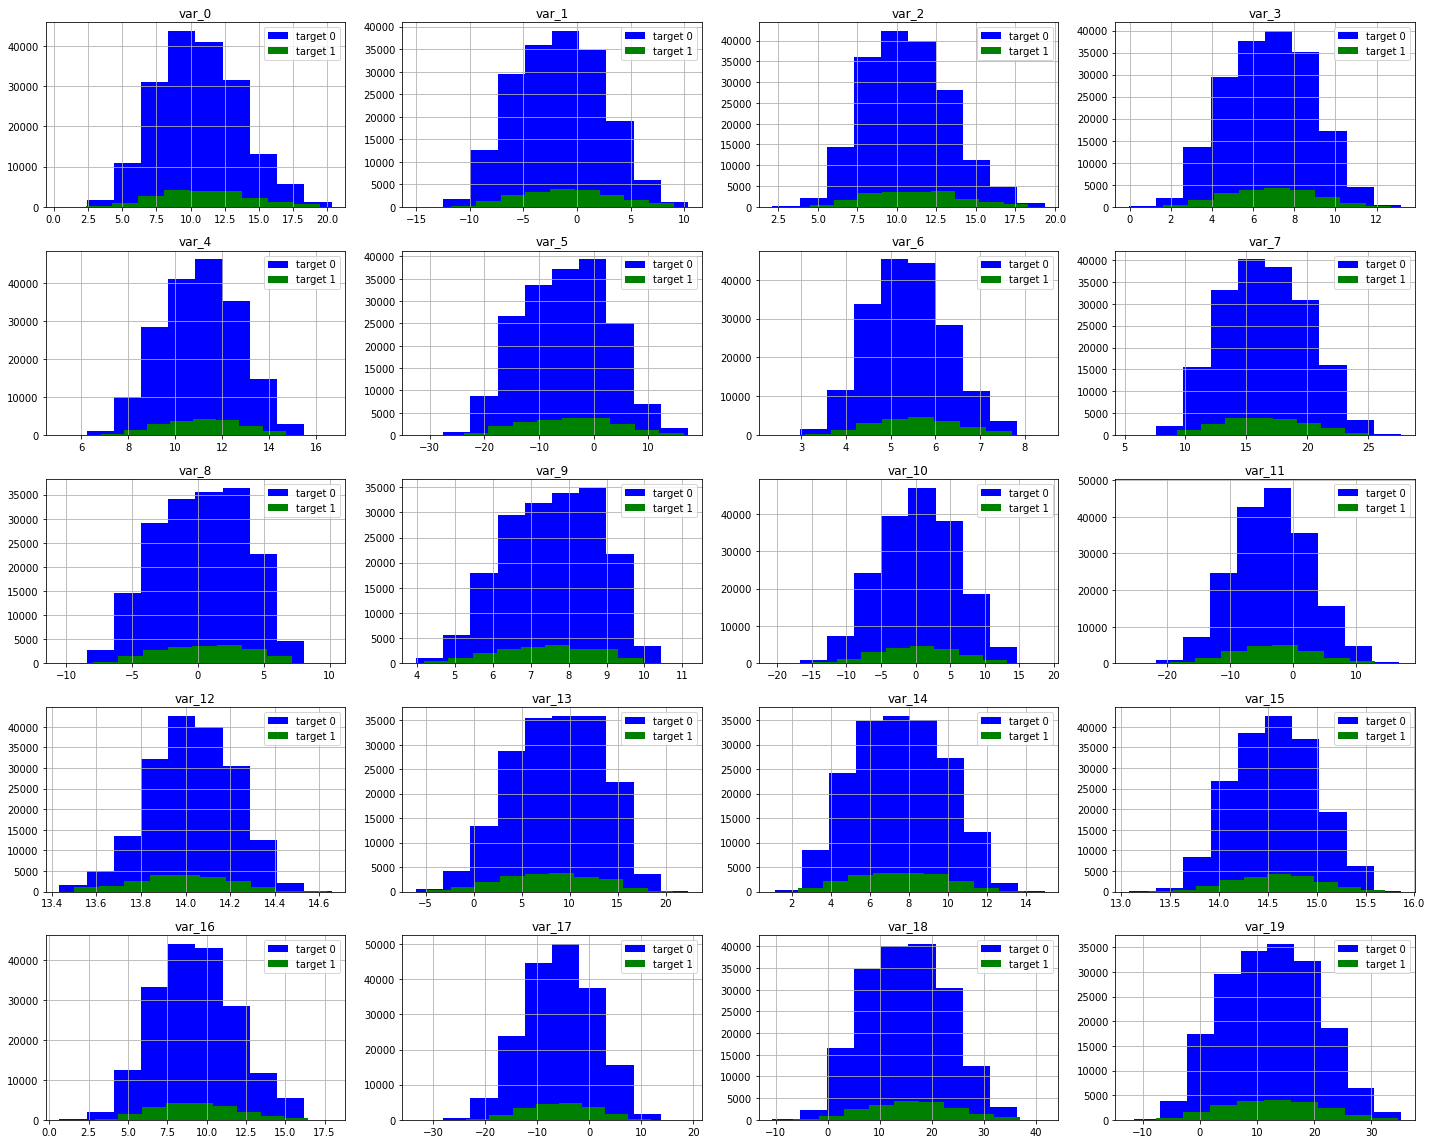

In [9]:
train_0 = train[train['target'] == 0]
train_1 = train[train['target'] == 1]
plt.figure(figsize=(20, 16))
for i, col in enumerate(dfcols[:20]):
    plt.subplot(5, 4, i + 1)
    plt.hist(train_0[col], label='target 0', color='blue')
    plt.hist(train_1[col], label='target 1', color='green')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### 결측치 확인

In [10]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (total / data.isnull().count() * 100)
    tmp = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tmp['Types'] = types
    print(tmp[tmp['Percent'] != 0].index)
    return np.transpose(tmp)

In [11]:
missing_data(train)

Index([], dtype='object')


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [12]:
missing_data(test)

Index([], dtype='object')


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


- 결측치 없음

### 데이터 중복(duplicate value)

In [13]:
unique_max_train = []
unique_max_test = []
for feature in dfcols:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [14]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by='Max duplicates', ascending=False, kind='quicksort'))

,68,108,126,12,91,103,148,71,161,25,...,70,74,90,96,120,199,61,187,30,136
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,...,var_70,var_74,var_90,var_96,var_120,var_199,var_61,var_187,var_30,var_136
Max duplicates,1084,313,305,203,66,61,59,54,52,41,...,7,7,7,7,7,7,6,6,6,6
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,...,31.4509,25.6287,-15.9328,8.6561,23.1806,-3.9853,-4.3454,-3.48,-14.9372,25.892


In [15]:
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by='Max duplicates', ascending=False, kind='quicksort'))

,68,126,108,12,91,103,148,161,25,71,...,70,120,176,61,187,102,74,136,45,54
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,...,var_70,var_120,var_176,var_61,var_187,var_102,var_74,var_136,var_45,var_54
Max duplicates,1104,307,302,188,86,78,74,69,60,60,...,14,14,14,14,14,14,13,13,13,13
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,...,26.1051,37.0676,-2.0551,-11.0639,0.1931,18.272,16.5129,9.7635,-15.5899,6.0151


- 비슷한 분포를 보인다

### 각 column별 사분위수 분석

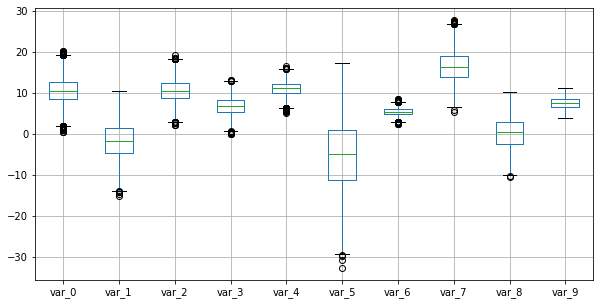

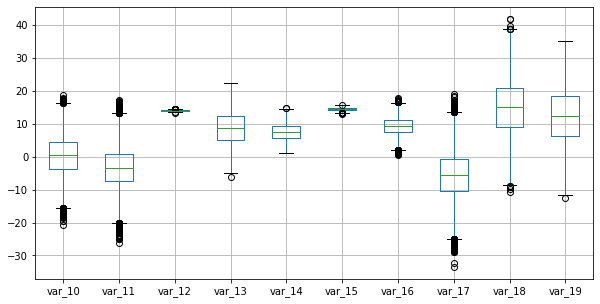

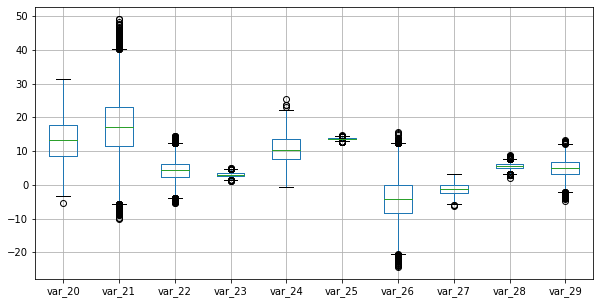

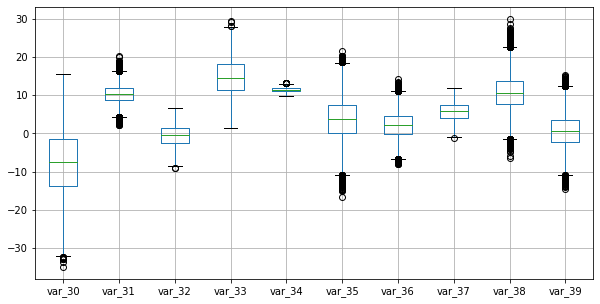

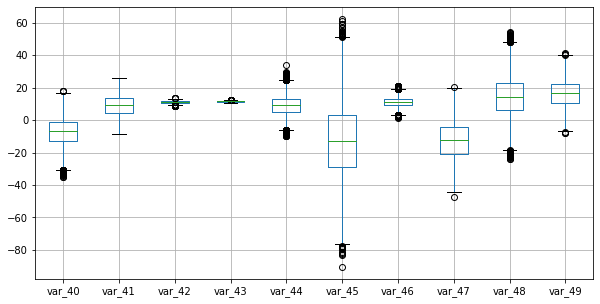

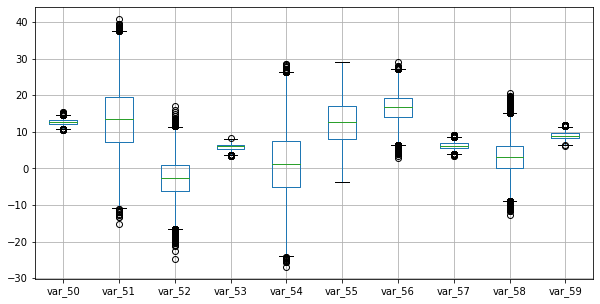

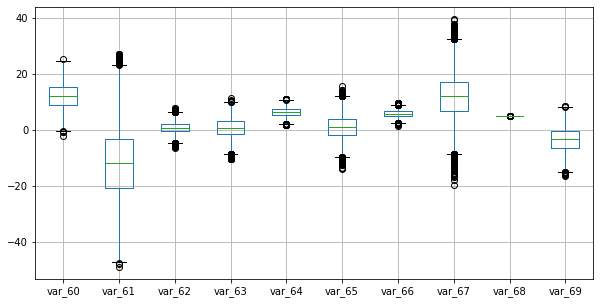

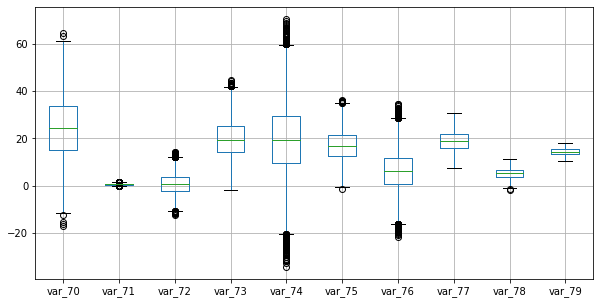

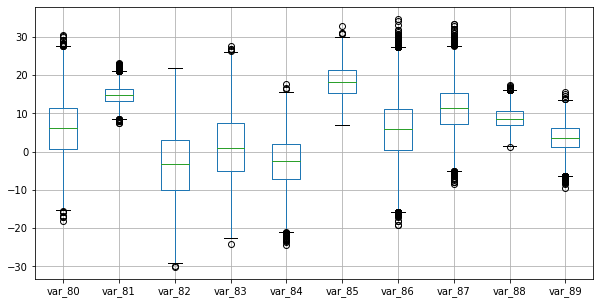

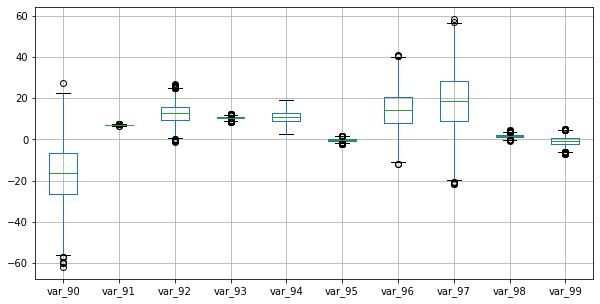

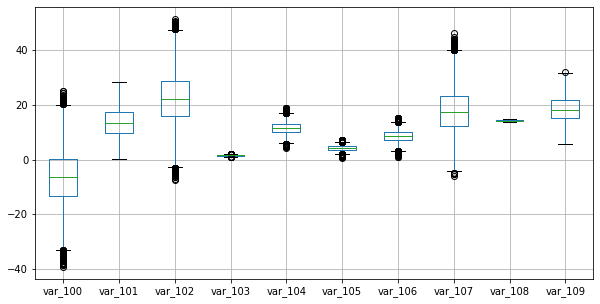

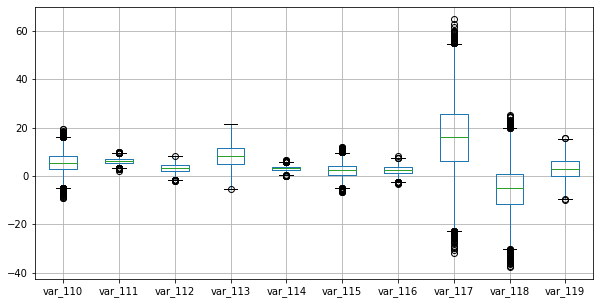

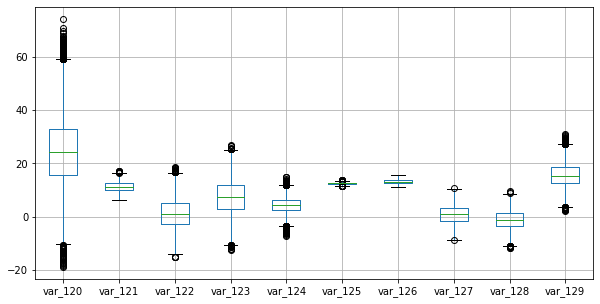

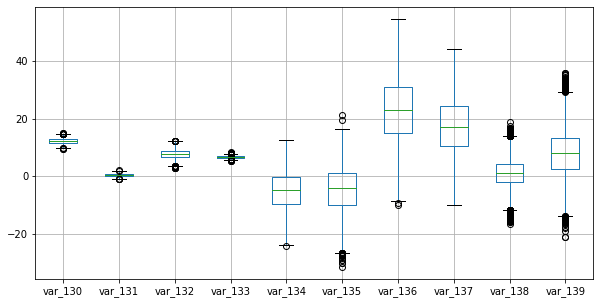

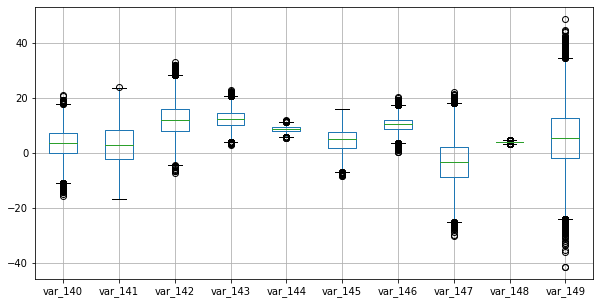

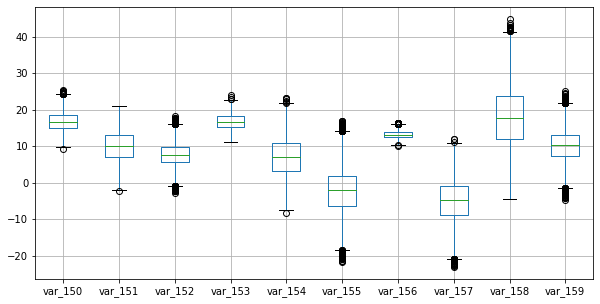

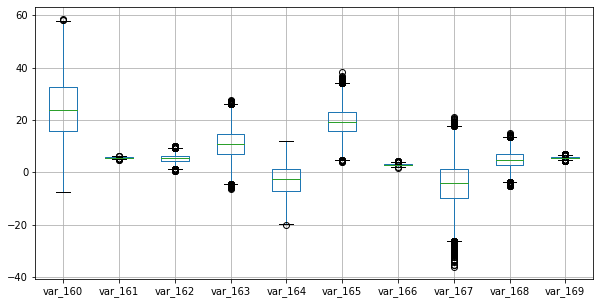

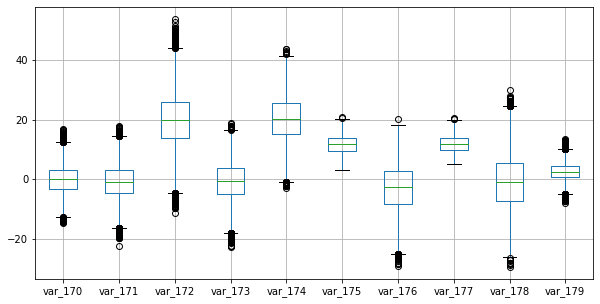

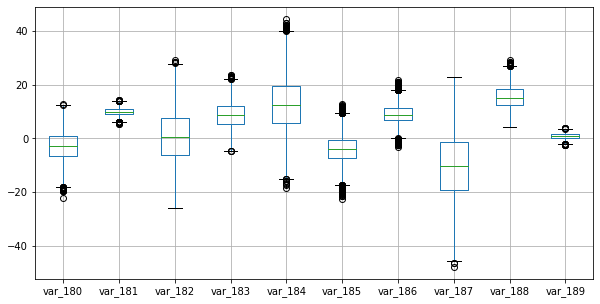

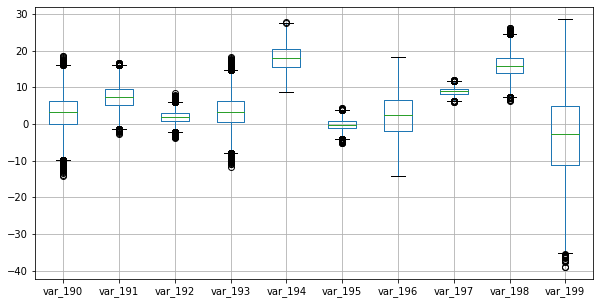

In [16]:
n = 10
chunks = [dfcols[x:x + n] for x in range(0, len(dfcols), n)]
for i in chunks:
    # sns.boxplot(data=train, y=i, sym='k.')
    plt.show(train.boxplot(column=i, figsize=(10,5)))

### 상관관계 분석

In [17]:
# sns.heatmap(train.drop(['target', 'ID_code'], axis=1).corr())

- 변수가 너무 많아 heatmap로 상관관계를 분석하기 불가능함

In [18]:
train.corr().abs().unstack()

target   target     1.000000
         var_0      0.052390
         var_1      0.050343
         var_2      0.055870
         var_3      0.011055
                      ...   
var_199  var_195    0.002042
         var_196    0.000607
         var_197    0.004991
         var_198    0.004731
         var_199    1.000000
Length: 40401, dtype: float64

In [19]:
train.corr().abs().unstack().sort_values(kind='quicksort')

var_191  var_75     2.703975e-08
var_75   var_191    2.703975e-08
var_173  var_6      5.942735e-08
var_6    var_173    5.942735e-08
var_126  var_109    1.313947e-07
                        ...     
var_128  var_128    1.000000e+00
var_127  var_127    1.000000e+00
var_126  var_126    1.000000e+00
var_124  var_124    1.000000e+00
var_199  var_199    1.000000e+00
Length: 40401, dtype: float64

In [20]:
df_corr = train.corr().abs().unstack().sort_values(kind='quicksort').reset_index()
df_corr

,level_0,level_1,0
0,var_191,var_75,2.703975e-08
1,var_75,var_191,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
40396,var_128,var_128,1.000000e+00
40397,var_127,var_127,1.000000e+00
40398,var_126,var_126,1.000000e+00
40399,var_124,var_124,1.000000e+00


In [21]:
df_corr.rename(columns={'level_0':'Feature_1', 'level_1': 'Feature_2', 0:'Correlation Coefficient'}, inplace=True)
df_corr

,Feature_1,Feature_2,Correlation Coefficient
0,var_191,var_75,2.703975e-08
1,var_75,var_191,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
40396,var_128,var_128,1.000000e+00
40397,var_127,var_127,1.000000e+00
40398,var_126,var_126,1.000000e+00
40399,var_124,var_124,1.000000e+00


In [22]:
df_corr.drop(df_corr.iloc[1::2].index, inplace=True) # 홀수 단위로 제거
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index) # 동일한 대상에 대한 상관관계 drop

In [23]:
df_corr_nd

,Feature_1,Feature_2,Correlation Coefficient
0,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
4,var_126,var_109,1.313947e-07
6,var_144,var_27,1.772502e-07
8,var_177,var_100,3.116544e-07
...,...,...,...
40190,var_110,target,6.427530e-02
40192,var_6,target,6.673085e-02
40194,var_12,target,6.948928e-02
40196,target,var_139,7.407963e-02


#### Target Distribution in Quartiles

- 각 feature별 사분위수 범위별로 target 1(정답데이터)가 얼마나 분포되었는지를 확인하는 방법

In [24]:
df_qdist = pd.DataFrame(np.zeros((200, 9)), columns=['Quartile 1 Positives', 'Quartile 2 Positives', 'Quartile 3 Positives', 'Quartile 4 Positives',
                                                    'Quartile 1 Positives Percentage', 'Quartile 2 Positives Percentage', 'Quartile 3 Positives Percentage', 'Quartile 4 Positives Percentage',
                                                    'Quartile Order'])
df_qdist

,Quartile 1 Positives,Quartile 2 Positives,Quartile 3 Positives,Quartile 4 Positives,Quartile 1 Positives Percentage,Quartile 2 Positives Percentage,Quartile 3 Positives Percentage,Quartile 4 Positives Percentage,Quartile Order
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# feature에 해당하는 컬럼명을 리스트에 담는다.
features = [col for col in train.columns.values.tolist() if col.startswith('var')]
df_qdist.index = features

In [26]:
#사분위수(0, 0.25, 0.5, 1) 담은 array 만듦
quartiles = np.arange(0, 1, 0.25)

for i, feature in enumerate(features):
    for j, quartile in enumerate(quartiles):
        target_counts = train[np.logical_and(train[feature] >= train[feature].quantile(q=quartile),
                                            train[feature] < train[feature].quantile(q=quartile+0.25))].target.value_counts() # 0, 1에 대한 개수
        positive_ratio = target_counts[1] / (target_counts[0] + target_counts[1]) * 100 # 1비율
        df_qdist.iloc[i, j] = target_counts[1]
        df_qdist.iloc[i, j + 4] = positive_ratio

In [27]:
df_qdist

,Quartile 1 Positives,Quartile 2 Positives,Quartile 3 Positives,Quartile 4 Positives,Quartile 1 Positives Percentage,Quartile 2 Positives Percentage,Quartile 3 Positives Percentage,Quartile 4 Positives Percentage,Quartile Order
var_0,4518.0,4472.0,4725.0,6383.0,9.036000,8.944000,9.450378,12.766000,0.0
var_1,4325.0,4641.0,5093.0,6039.0,8.650000,9.282000,10.186000,12.078242,0.0
var_2,4449.0,4432.0,4926.0,6291.0,8.898000,8.864177,9.852000,12.582000,0.0
var_3,4850.0,4930.0,5105.0,5213.0,9.700000,9.860986,10.209183,10.426000,0.0
var_4,4931.0,4937.0,4931.0,5299.0,9.862000,9.874000,9.862000,10.598212,0.0
...,...,...,...,...,...,...,...,...,...
var_195,4717.0,4770.0,4898.0,5713.0,9.434189,9.540572,9.795412,11.426000,0.0
var_196,4650.0,4883.0,5055.0,5510.0,9.300000,9.766391,10.109596,11.020220,0.0
var_197,5680.0,5075.0,4791.0,4552.0,11.361363,10.149188,9.582192,9.103636,0.0
var_198,6277.0,4904.0,4439.0,4478.0,12.554251,9.807804,8.878000,8.956179,0.0


## Feature Engineering
- 모델의 정확도를 높이기 위해서 주어진 데이터를 예측 모델링 문제를 잘 표현할 수 있는 feature로 변형시키는 과정

- 분석 항목
    1. sum
    2. min
    3. max
    4. mean
    5. standard deviation
    6. skewness
    7. kurtosis
    8. median

In [30]:
idx = dfcols
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurt(axis=1)
    df['median'] = df[idx].median(axis=1)

In [31]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,median
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,17.9697,-8.9996,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [32]:
test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,median
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,15.4722,-8.7197,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,19.1293,-20.9760,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,19.8956,-23.1794,1430.2599,-34.3488,39.3654,7.151299,9.967466,-0.135084,2.326901,7.26355
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,13.0168,-4.2108,1411.4447,-21.4797,40.3383,7.057223,8.257204,-0.167741,2.253054,6.89675
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,13.9260,-9.1846,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375


- kurtosis이 둘다 nan이 존재하기 떄문에 kurt 제거

In [33]:
test.drop(['kurt'], axis=1, inplace=True)